Notebook im eigenen Browser öffnen: 

<font size="10">https://tinyurl.com/dataviz200623</font>

<br>

# Data Viz Meeting, 20.06.23

<font size="10"> > Don't teach me, let me learn!</font>

Was braucht es, um zu lernen:

- **Ausprobieren**
- **Iteratives Vorgehen**

## Was macht eine gute Datenvisualisierung aus?

- Ein **bestehender Sachverhalt wird anschaulich transportiert** (deskriptive Visualisierung)
- Mit Hilfe der Visualisierung werden **neue Sachverhalte entdeckt** (explorative Visualisierung)
- Der Prozess der Entstehung ist nachvollziehbar und regt dazu an, **selbst tätig zu werden**

## <a href="https://jupyter.org/"><img src="https://jupyter.org/assets/homepage/main-logo.svg" width="100px">Jupyter Notebook</a>

Idee: 

- Programmieren ohne Software-Installation
- Input/Output über die gleiche Oberfläche
- Iterativ vorgehen (und alte Resultate gleichberechtigt stehen lassen)
- Umfangreiche Möglichkeit, Code, Resultate und Learnings zu dokumentieren

### Problem

- Verlangt eigentlich ein ziemlich aufwändiges und ausgebautes **Backend** (Ausführen von Code auf Server)

### Lösung

<a href="https://jupyterlite.readthedocs.io/en/latest/"><img src="https://jupyterlite.readthedocs.io/en/latest/_static/wordmark.svg" width="150px"></a> ist die komplett browserbasierte Variante von JupyterLab. Python Code wird im Browser lokal mit Hilfe von <a href="https://pyodide.org/en/stable/"><img src="https://pyodide.org/en/stable/_static/pyodide-logo.png" width="200px"></a> ausgeführt.

JupyterLite Notebooks können sehr einfach auf <a href="https://github.com">GitHub<img src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" width="100px"></a> gehostet werden. Mit Hilfe von GitHub Actions wird das Notebook bei jedem Commit neu gebildet.

<br>

# Beispiel "Old Faithful"

In [1]:
# import the necessary modules

from pyodide.http import open_url
from io import StringIO
import pandas as pd
import matplotlib.pyplot as plt

## Daten einlesen und anzeigen

- URL zu CSV Daten
- Separator

--> sehr einfach anpassbar

In [2]:
url="https://raw.githubusercontent.com/gchoi/Dataset/master/OldFaithful.csv"

data = pd.read_csv(StringIO(open_url(url).read()), 
                   sep = ",")

data.head(20)

,TimeEruption,TimeWaiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


## Frage

Was sind die Eigenschaften dieser zwei Spalten und gibt es allenfalls einen Zusammenhang zwischen den Spalten?

In [3]:
# define size of figures in output
plt.rcParams['figure.figsize'] = [12, 8]

Einfach mal die Daten plotten!

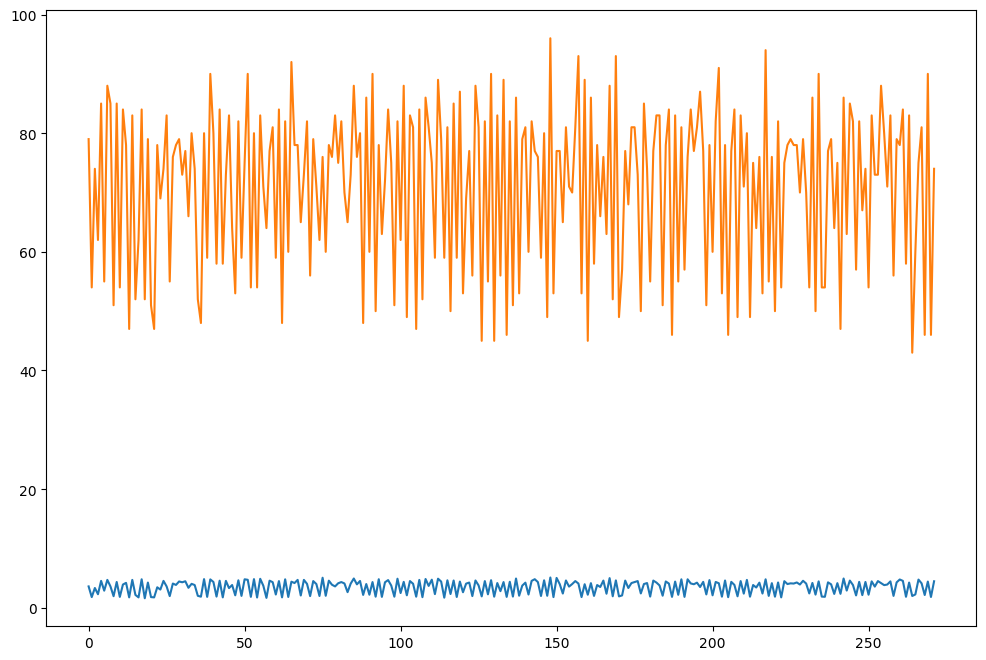

In [4]:
plt.plot(data)

plt.show()

Noch mässig hilfreich, besser die Spalten gegeneinander plotten...

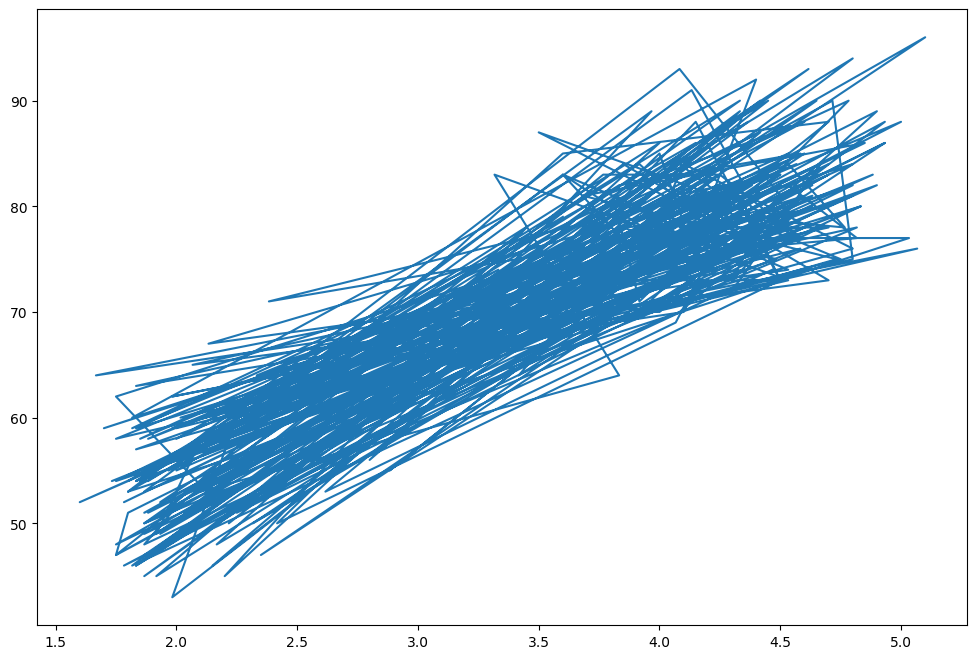

In [5]:
plt.plot(data.TimeEruption, data.TimeWaiting)

plt.show()

Sackgasse! Es ist nicht relevant, dass die Zeilen in einer Abfolge stehen, sondern es geht um den Zusammenhang der beiden Spalten...

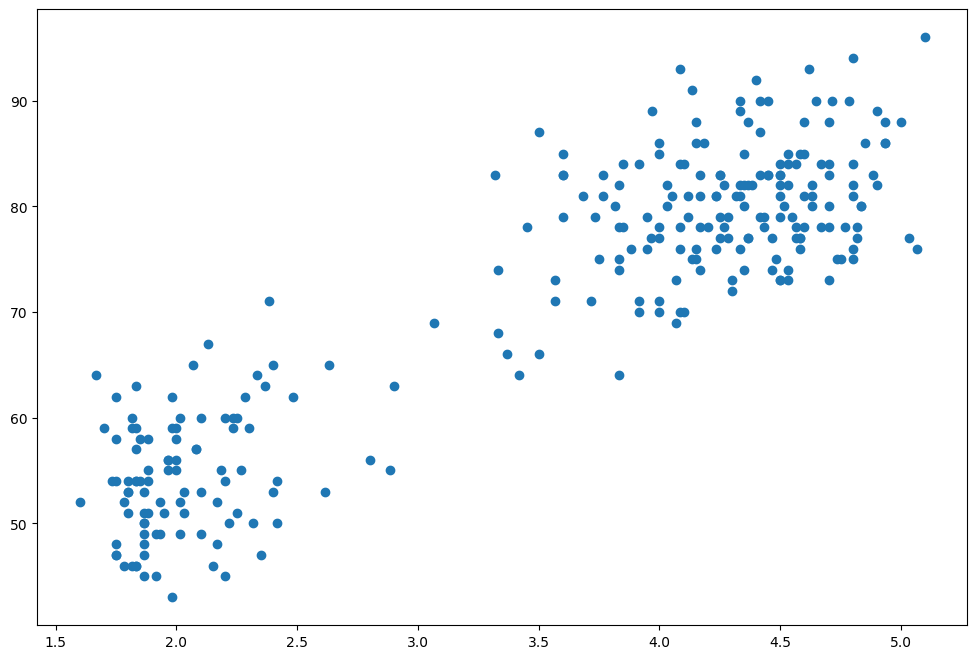

In [6]:
plt.scatter(data.TimeEruption, data.TimeWaiting)

plt.show()

Aha. Jetzt sehen wir, es gibt scheinbar einen Zusammenhang und es zeigen sich zwei "Cluster" von Daten. Jetzt noch etwas "beautifiying"...

## Finales Resultat

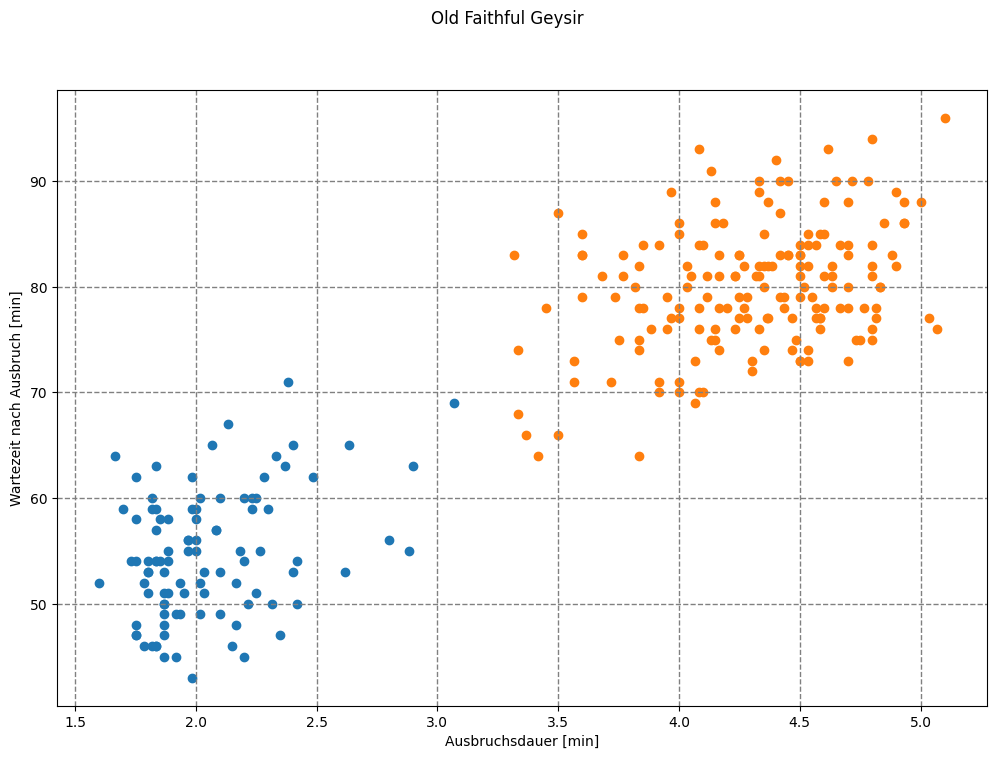

In [7]:
# separate data into two dataframes depending on the 'TimeEruption'
data_short = data[data.TimeEruption <= 3.25]
data_long = data[data.TimeEruption > 3.25]

plt.scatter(data_short.TimeEruption, data_short.TimeWaiting)
plt.scatter(data_long.TimeEruption, data_long.TimeWaiting)

plt.suptitle("Old Faithful Geysir")
plt.xlabel("Ausbruchsdauer [min]")
plt.ylabel("Wartezeit nach Ausbruch [min]")
plt.grid(color = "grey", linestyle = "--", linewidth=1)

plt.show()

# Impressum

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg" /></a><br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Autor: [Benedikt Hitz-Gamper](https://www.linkedin.com/in/benedikt-hitz-gamper-331756209/), [BFH - Institut Public Sector Transformation](https://www.bfh.ch/wirtschaft/de/forschung/forschungsbereiche/public-sector-transformation/)